# Setup

## Merge both datasets

In [7]:
# Import packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [8]:
# Load the datasets
df1 = pd.read_csv("../data/old_training_dataset.csv")
df2 = pd.read_csv("../data/new_training_dataset.csv")

In [9]:
df1.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [10]:
df2.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


There are a few features that appear to be similar based on their names.

We can expect some issues because the older dataset has only binary features. For example, the first visible one is the 'URL_Length' which in the newer dataset has values such as 31, 23, 29... However, we plan to check the final distribution to see if normalization/scaling is needed.

In [11]:
# Rename columns in df2 to match df1
df2 = df2.rename(columns={
    "URLLength": "URL_Length",
    "DomainLength": "Domain_registeration_length",
    "NoOfSubDomain": "having_Sub_Domain",
    "HasFavicon": "Favicon",
    "NoOfURLRedirect": "Redirect",
    "NoOfiFrame": "Iframe",
    'label': 'Result'
})

In [12]:
df2.head()

,URL_Length,Domain_registeration_length,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,having_Sub_Domain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,Result
0,31,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


This step of selecting features is important as we want to ensure consistency between the two datasets.

Some features had similar meaning but different names.
- 'NoOfURLRedirect' was renamed to 'Redirect' despite the presence of 'NoOfSelfRedirect' because it aligns better with the idea of how many times the user is redirected through external URLs.
- 'DomainLength' was mapped to 'Domain_registeration_length'
- And the rest was renamed to their respective equivalents as well, based on their descriptions and role

In [13]:
# To keep only common columns, we decided to simply take the intersection of their sets
common_columns = list(set(df1.columns) & set(df2.columns))
df1_cc = df1[common_columns].copy()
df2_cc = df2[common_columns].copy()

In [14]:
# Downsample the new dataset
df2_sampled = df2_cc.sample(n=len(df1_cc), random_state=42) # we set the random_state for reproducibility

Looking at both datasets, we noticed a higher number of elements for each feature that the new dataset has. Due to this, we thought that it would be better to downsample it to the same length as for the older one, so that it won't dominate the training.

In [15]:
# Combine datasets
merged_df = pd.concat([df1_cc, df2_sampled], ignore_index=True) # We included ignore_index because Pandas preserves the original row indices, and we want to reindex everything from scratch for a cleaner version

In [16]:
# Move the target class to the end
result = merged_df.pop('Result')
merged_df['Result'] = result

In [17]:
# Preview
print(merged_df.head())

   having_Sub_Domain  Favicon  URL_Length  Iframe  Redirect  \
0                 -1        1           1       1         0   
1                  0        1           1       1         0   
2                 -1        1           0       1         0   
3                 -1        1           0       1         0   
4                  1        1           0       1         0   

   Domain_registeration_length  Result  
0                           -1      -1  
1                           -1      -1  
2                           -1      -1  
3                            1      -1  
4                           -1       1  


In [18]:
# Save as csv
merged_df.to_csv("../data/merged_dataset.csv", index=False)

# Explore the merged dataset

In [19]:
# Load the dataset
df = pd.read_csv("../data/merged_dataset.csv")

In [20]:
# See the first 5 rows
df.head()

,having_Sub_Domain,Favicon,URL_Length,Iframe,Redirect,Domain_registeration_length,Result
0,-1,1,1,1,0,-1,-1
1,0,1,1,1,0,-1,-1
2,-1,1,0,1,0,-1,-1
3,-1,1,0,1,0,1,-1
4,1,1,0,1,0,-1,1


In [21]:
# Print information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22110 entries, 0 to 22109
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_Sub_Domain            22110 non-null  int64
 1   Favicon                      22110 non-null  int64
 2   URL_Length                   22110 non-null  int64
 3   Iframe                       22110 non-null  int64
 4   Redirect                     22110 non-null  int64
 5   Domain_registeration_length  22110 non-null  int64
 6   Result                       22110 non-null  int64
dtypes: int64(7)
memory usage: 1.2 MB


We can already see that features are not null integers. Moreover, we already checked each dataset individually, and we proved the same thing. Therefore, we will skip the check of null values.

In [22]:
df.describe()

,having_Sub_Domain,Favicon,URL_Length,Iframe,Redirect,Domain_registeration_length,Result
count,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000
mean,0.609679,0.491678,16.819900,1.178245,0.124016,10.498507,0.342515
std,0.898069,0.660044,27.650745,3.570111,0.329608,12.599674,0.817488
min,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000
25%,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000
50%,1.000000,1.000000,7.500000,1.000000,0.000000,2.500000,1.000000
75%,1.000000,1.000000,28.000000,1.000000,0.000000,20.000000,1.000000
max,6.000000,1.000000,722.000000,263.000000,1.000000,93.000000,1.000000


In [23]:
# Check for duplicates
df.duplicated().sum()

np.int64(18887)

The number of duplicates was expected due to binary features.

In [24]:
# Check target class
df['Result'].value_counts()

Result
 1    12471
-1     4898
 0     4741
Name: count, dtype: int64

It is clear that class 1 dominates and introduces imbalance.

## Check class imbalance

<Axes: xlabel='Result', ylabel='count'>

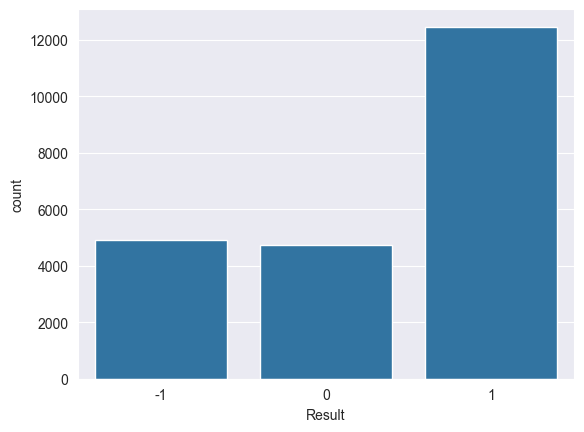

In [25]:
# Class distribution plot
sns.countplot(x='Result', data=df)

The plot helps us visualize even better the difference that exists between 1 and the other classes.